#1. 풀어야할 문제 이해하기


*   정확한 값을 예측하는 회귀 문제인가?
*   입력이 속한 범주를 예측하는 분류 문제인가?



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **[문제] 손으로 쓴 0-9까지 숫자 분류하기**

In [3]:
#데이터셋 다운로드
#캐글 https://www.kaggle.com/datasets/oddrationale/mnist-in-csv
dir = '/content/drive/MyDrive/ml-class-rhseung/data'

# 2. 데이터 파악하기


*   입력 자료형과 정답 확인하기
*   클래스 간의 불균형은 없는지 확인하기
*   누락된 데이터 혹은 자료형에 맞지 않는 데이터가 포함되어 있는지 확인하기



In [4]:
#데이터 파악을 위한 모듈 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#데이터 불러오기
train = pd.read_csv(f"{dir}/mnist_train.csv")
test = pd.read_csv(f"{dir}/mnist_test.csv")
#데이터 크기 확인
train.shape, test.shape

((60000, 785), (10000, 785))

In [6]:
#입력 자료형과 정답 확인
train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### **문제1 클래스 간의 불균형 여부 확인하기**

In [7]:
# train 데이터 클래스(정답) 간의 불균형은 없는지 확인하기
train['label'].value_counts()

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: label, dtype: int64

#### **문제2 누락된 데이터가 있는지 확인하기**

In [8]:
# 누락된 데이터가 있는지 확인하기
np.where(train.isna().values == True)

(array([], dtype=int64), array([], dtype=int64))

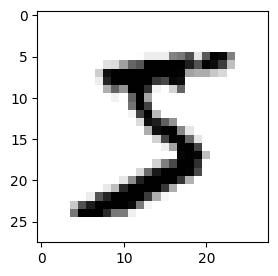

In [9]:
#이미지 확인하기
#2차원 넘파이 데이터로 변환하기
sample = train.iloc[0][1:]
sample.shape
sample_numpy = sample.to_numpy()
sample_numpy.shape
sample_numpy_2D = sample_numpy.reshape(28,28)
sample_numpy_2D.shape
#이미지로 출력하기
plt.figure(figsize=(3,3))
plt.imshow(sample_numpy_2D)
plt.imshow(sample_numpy_2D, cmap=plt.cm.gray_r, interpolation = "nearest")

#### **문제3 각 클래스별 데이터 10개씩 출력하기**

In [10]:
train[train['label'] == 0].iloc[1]

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Name: 21, Length: 785, dtype: int64

In [11]:
train['label']

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64

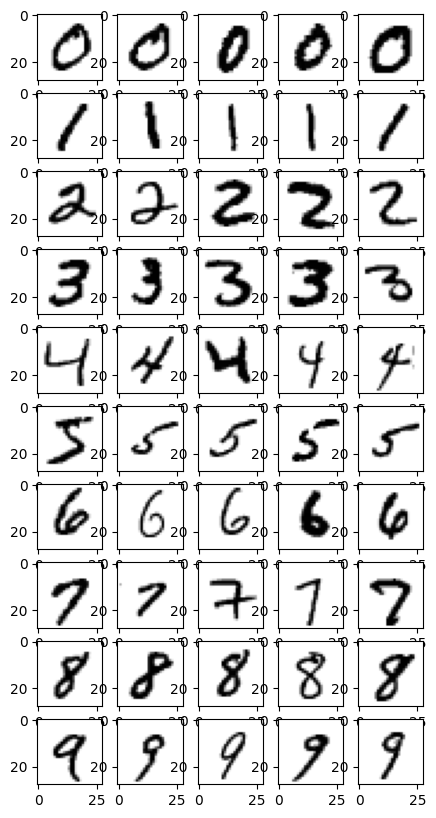

In [12]:
#각 클래스별 데이터 5개씩 출력해보기
fig, ax = plt.subplots(10, 5, figsize=(1*5, 1*10))

for i in range(10):
    for j in range(5):
        ax[i, j].imshow(train[train['label'] == i].iloc[j, 1:].values.reshape((28, 28)), cmap=plt.cm.gray_r)

# 3. 데이터 전처리


*   학습에 필요한 데이터가 부족하다면 데이터 증강하기
*   데이터를 정규화해서 값의 범위 맞추기
*   문제 데이터, 정답 데이터 분리
*   학습 데이터, 검증 데이터, 테스트 데이터 분리 : 클래스별 균형 맞추기



#### **문제4 이미지(문제 데이터)와 라벨(정답) 분리**

In [13]:
# 문제 데이터(이미지)와 정답(라벨) 데이터 분리
train_X = train.iloc[:, 1:].values
train_Y = train['label'].values
test_X = test.iloc[:, 1:].values
test_Y = test['label'].values

train_X.shape, train_Y.shape, test_X.shape, test_Y.shape

((60000, 784), (60000,), (10000, 784), (10000,))

(array([5923., 6742., 5958., 6131., 5842., 5421., 5918., 6265., 5851.,
        5949.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

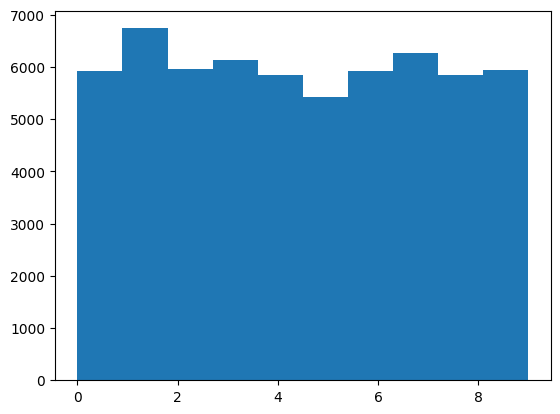

In [14]:
plt.hist(train_Y)

In [15]:
train_Y.shape

(60000,)

#### **문제5 데이터의 범위를 0 ~ 1 사이로 변환하기리**

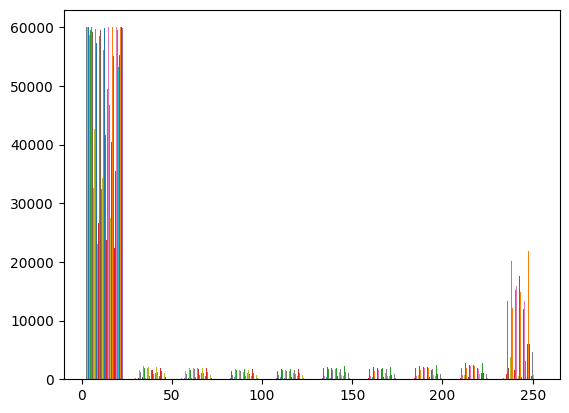

In [16]:
#데이터 분포 살펴보기
plt.hist(train_X)
plt.show()

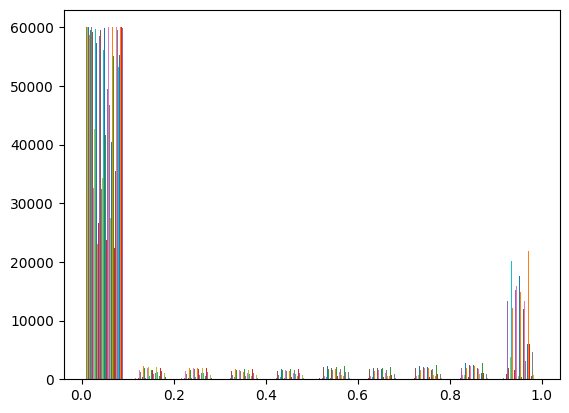

In [17]:
#데이터 정규화 : 데이터의 범위를 0~1 사이로 변환하기
train_X_scaled, test_X_scaled = train_X / 255, test_X / 255
plt.hist(train_X_scaled)
plt.show()

#### **문제6 학습 데이터와 검증 데이터로 분리하기**

In [18]:
#학습 데이터와 검증 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(train_X_scaled, train_Y, test_size=0.2, random_state=123)

# 4. 모델 설계 및 학습

(모델 설계)
*   문제의 복잡성, 사용 가능한 데이터의 양 및 종류, 예측이나 분류의 목표 등에 따라 적합한 머신러닝 기법과 모델은 다양하게 변할 수 있다.
*  데이터의 공간 정보가 중요하면 합성곱 적용하기
*  데이터의 순서 정보가 중요하다면 RNN 적용하기

(모델 학습)  
*   적합한 손실 함수 찾기
*   가중치 수정을 위한 최적화 정하기
*   평가지표 정하기  




In [ ]:
#torchvision에서는 데이터셋을 제공해줌

# from torchvision.datasets.mnist import MNIST
# from torchvision.transforms import ToTensor
# from torch.utils.data.dataloader import DataLoader

# training_data = MNIST(root="/content", train=True, download=True, transform=ToTensor())
# test_data =  MNIST(root="/content", train=False, download=True, transform=ToTensor())

# train_loader = DataLoader(training_data, batch_size=32, shuffle=True)
# test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

In [19]:
#csv -> padas 데이터프레임으로 변환한 데이터를 활용하는 경우
import torch
from torch.utils.data import Dataset, DataLoader

#커스텀 Dataset 정의
class myDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        features = self.X[idx]
        target = self.Y[idx]
        return torch.tensor(features, dtype=torch.float32), torch.tensor(target, dtype=torch.long)

train_dataset = myDataset(train_X_scaled, train_Y)
test_dataset = myDataset(test_X_scaled, test_Y)
#Dataset을 DataLoader로 변환
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

In [20]:
for data, label in train_dataloader:
    print(data.shape)
    print(label.shape)
    break

torch.Size([32, 784])
torch.Size([32])


In [21]:
for data, label in test_dataloader:
    print(data.shape)
    print(label.shape)
    break

torch.Size([32, 784])
torch.Size([32])


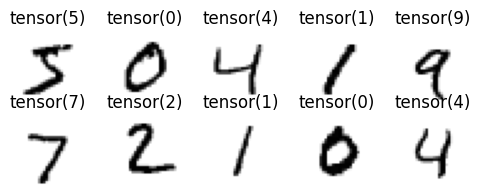

In [22]:
fig, axis = plt.subplots(2, 5, figsize=(6, 2))

for i in range(5):
    ith_data = train_dataset[i]

    axis[0, i].set_axis_off()
    axis[0, i].imshow(ith_data[0].cpu().view((28, 28)), cmap='gray_r')
    axis[0, i].set_title(ith_data[1])

for i in range(5):
    ith_data = test_dataset[i]

    axis[1, i].set_axis_off()
    axis[1, i].imshow(ith_data[0].cpu().view((28, 28)), cmap='gray_r')
    axis[1, i].set_title(ith_data[1])

In [23]:
#모델 설계 및 학습
import torch.nn as nn
import torch.optim as optim

model = nn.Sequential(
    nn.Linear(784, 10)
)

cost = nn.CrossEntropyLoss()
optim = optim.Adam(model.parameters(), lr=0.001)

In [24]:
epochs = 20
batch_size = 32

for epoch in range(epochs):
    avg_loss_per_batch = 0

    for X, Y in train_dataloader:
        optim.zero_grad()
        predicted = model(X)
        loss = cost(predicted, Y)
        loss.backward()
        optim.step()

        avg_loss_per_batch += loss / batch_size

    print(f'Epoch {epoch+1}/{epochs}, loss={avg_loss_per_batch}')

Epoch 1/20, loss=27.040708541870117
Epoch 2/20, loss=17.727149963378906
Epoch 3/20, loss=16.551441192626953
Epoch 4/20, loss=15.974386215209961
Epoch 5/20, loss=15.586054801940918
Epoch 6/20, loss=15.358915328979492
Epoch 7/20, loss=15.125014305114746
Epoch 8/20, loss=14.952094078063965
Epoch 9/20, loss=14.806849479675293
Epoch 10/20, loss=14.693273544311523
Epoch 11/20, loss=14.581944465637207
Epoch 12/20, loss=14.526932716369629
Epoch 13/20, loss=14.413031578063965
Epoch 14/20, loss=14.377193450927734
Epoch 15/20, loss=14.273385047912598
Epoch 16/20, loss=14.213984489440918
Epoch 17/20, loss=14.181964874267578
Epoch 18/20, loss=14.128018379211426
Epoch 19/20, loss=14.0892972946167
Epoch 20/20, loss=14.034791946411133


In [25]:
len(test_dataloader) * 32

10016

In [26]:
#모델 성능 평가
#모델 불러오기
with torch.no_grad():
    correct = 0
    total = 0

    for X, Y in test_dataloader:
        predicted = torch.argmax(model(X), dim=1)
        is_correct = predicted == Y

        correct += is_correct.sum()
        total += len(predicted)

    print(f'Accuracy: {correct/total}')


Accuracy: 0.9262999892234802
